In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import f1_score




from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex
from sklearn.ensemble import ExtraTreesClassifier


In [2]:



#reading the data
from scaled_data import *
X,y = clean_data()

best_x=['PageValues_skew_s', 'TrafficType_dummies_8',
        'Region_dummies_2','season_dummies_Spring',
        'OperatingSystems_dummies_2', 'Region_dummies_1',
       'Weekend_binary','TrafficType_dummies_2',
        'average_informational_duration_skew_s','average_ProductRelated_duration_skew_s', 
        'average_administrative_duration_skew_s','average_BounceRates/ExitRates_skew_s',
        'season_dummies_Fall']
#X=X[best_x]
VC_Xdata = X.copy() #making our X columns


#getting the values of our x features:
#Xrf_model = rf_model_Xdata[best_features_spsa].values
#Xrf_model= rf_model_Xdata[cols_2].values
XVC_model = VC_Xdata.values

#getting the values of our y:
y_VC_model = y.values.ravel() # target


from sklearn.model_selection import train_test_split

#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XVC_model, y_VC_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)




from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 
  
from sklearn.ensemble import ExtraTreesClassifier

  
seed = 123
kfold = model_selection.KFold(n_splits = 3, 
                       random_state = seed) 
  
# initialize the base classifier 
base_cls = RandomForestClassifier(max_depth =  4 ,
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                 
                                  random_state=123)
# no. of base classifier 
num_trees = 100
  
# bagging classifier 
eclf = BaggingClassifier(
                          n_estimators = num_trees, 
                          random_state = seed) 
  
#results = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv = kfold) 

eclf.fit(X_train_bal,y_train_bal)

eclf_train_pred= eclf.predict(X_train_bal)

eclf_test_pred = eclf.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Training Metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 1.0
Roc -Auc Curve 1.0
Test Metrics
Accuracy: 0.8692831657476484
Precision: 0.5780141843971631
Recall: 0.6639511201629328
F1: 0.872872087515688
Roc -Auc Curve 0.7860650662543059
Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2592
           1       0.58      0.66      0.62       491

    accuracy                           0.87      3083
   macro avg       0.76      0.79      0.77      3083
weighted avg       0.88      0.87      0.87      3083



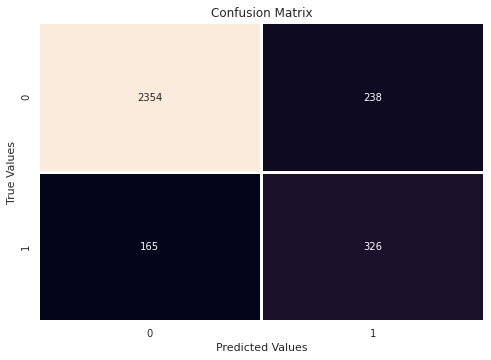

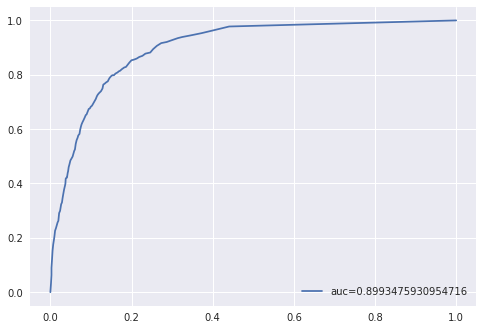

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support
eclf.fit(X_train_bal,y_train_bal)

eclf_train_pred= eclf.predict(X_train_bal)

eclf_test_pred = eclf.predict(X_test)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,eclf_train_pred))
print("Precision:",precision_score(y_train_bal,eclf_train_pred))
print("Recall:",recall_score(y_train_bal,eclf_train_pred))
print("f1:",f1_score(y_train_bal,eclf_train_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_bal,eclf_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,eclf_test_pred))
print("Precision:",precision_score(y_test,eclf_test_pred))
print("Recall:",recall_score(y_test,eclf_test_pred))
print("F1:",f1_score(y_test,eclf_test_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,eclf_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,eclf_test_pred))




from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, eclf_test_pred)

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = eclf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
results = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv = 5) 
print("accuracy :") 
print(results.mean())
auc = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv = 5, scoring='roc_auc') 
print("accuracy :") 
print(results.mean())
results = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv = 5,scoring='f1') 
print("f1 :") 
print(results.mean())

In [4]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 
  
from sklearn.ensemble import ExtraTreesClassifier

  
seed = 123
kfold = model_selection.KFold(n_splits = 3, 
                       random_state = seed) 
  
# initialize the base classifier 
base_cls = RandomForestClassifier(max_depth =  4 ,
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123)
# no. of base classifier 
num_trees = 40
  
# bagging classifier 
eclf = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
#results = model_selection.cross_val_score(model, X_train_bal, y_train_bal, cv = kfold) 
'''print("accuracy :") 
print(results.mean())'''

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


'print("accuracy :") \nprint(results.mean())'

In [6]:

eclf.fit(X_train_bal,y_train_bal)

eclf_train_pred= eclf.predict(X_train_bal)

eclf_test_pred = eclf.predict(X_test)

In [ ]:
clf1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,
                                  max_depth=7, min_samples_split=10,
                                  min_samples_leaf=1, subsample=1,
                                  random_state=123)
                                     
GB_best_features = ['Browser_dummies_2', 'TrafficType_dummies_8', 
                    'Region_dummies_2', 'season_dummies_Spring',
                    'OperatingSystems_dummies_2', 'Region_dummies_3',
                    'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
                    'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']                      
clf2 = ExtraTreesClassifier(n_estimators=300,
                                      max_depth=4,min_samples_split=5,
                                      min_samples_leaf=2,criterion='gini',
                                      min_weight_fraction_leaf=0.0,random_state=123)



RF_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
                    'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor',
                    'VisitorType_dummies_Returning_Visitor',
                    'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
                    'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
                    'TrafficType_dummies_2', 'season_dummies_Fall',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']

clf3 = SVC(C=1, break_ties=False, cache_size=200,
           class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,
           gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=123,
           shrinking=True, tol=0.001,
           verbose=False)


SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']

eclf = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')





In [7]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score



def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')

Decision tree classifier performance:
Balanced accuracy: 0.72 - Geometric mean 0.69
[[2340  252]
 [ 229  262]]



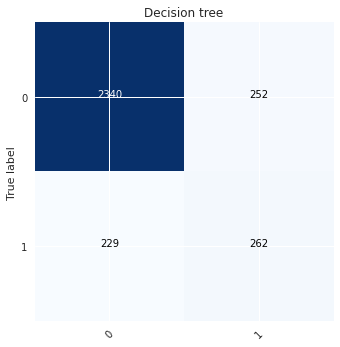

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision tree classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_tree),
              geometric_mean_score(y_test, y_pred_tree)))
cm_tree = confusion_matrix(y_test, y_pred_tree)
fig, ax = plt.subplots()
plot_confusion_matrix(cm_tree, classes=np.unique(y), ax=ax,
                      title='Decision tree' )

In [9]:
bagging = BaggingClassifier(n_estimators=50, random_state=0, n_jobs=-1)
balanced_bagging = BalancedBaggingClassifier(n_estimators = 100 ,
                                  random_state=123,
                                             n_jobs=-1)

bagging.fit(X_train_bal, y_train_bal)
balanced_bagging.fit(X_train_bal, y_train_bal)

y_pred_bc = bagging.predict(X_test)
y_pred_bbc = balanced_bagging.predict(X_test)

Bagging classifier performance:
Balanced accuracy: 0.78 - Geometric mean 0.78
[[2353  239]
 [ 166  325]]

Balanced Bagging classifier performance:
Balanced accuracy: 0.78 - Geometric mean 0.77
[[2357  235]
 [ 169  322]]



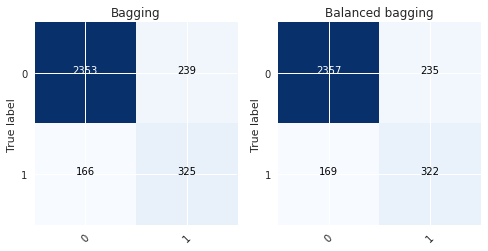

In [10]:
print('Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bc),
              geometric_mean_score(y_test, y_pred_bc)))
cm_bagging = confusion_matrix(y_test, y_pred_bc)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_bagging, classes=np.unique(np.unique(y)), ax=ax[0],
                      title='Bagging')

print('Balanced Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bbc),
              geometric_mean_score(y_test, y_pred_bbc)))
cm_balanced_bagging = confusion_matrix(y_test, y_pred_bbc)
plot_confusion_matrix(cm_balanced_bagging, classes=np.unique(np.unique(y)),
                      ax=ax[1], title='Balanced bagging')

Random Forest classifier performance:
Balanced accuracy: 0.72 - Geometric mean 0.68
[[2489  103]
 [ 253  238]]

Balanced Random Forest classifier performance:
Balanced accuracy: 0.83 - Geometric mean 0.83
[[2164  428]
 [  85  406]]



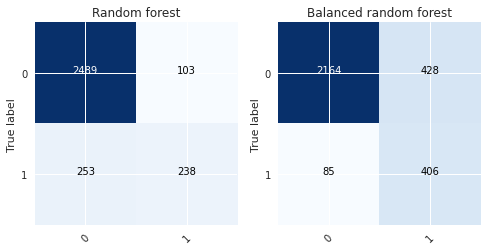

In [11]:
rf = RandomForestClassifier(n_estimators=300, random_state=123, n_jobs=-1)
brf = BalancedRandomForestClassifier(max_depth =  4 , 
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123,
                                     n_jobs=-1)

rf.fit(X_train, y_train)
brf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_brf = brf.predict(X_test)

# Similarly to the previous experiment, the balanced classifier outperform the
# classifier which learn from imbalanced bootstrap samples. In addition, random
# forest outsperforms the bagging classifier.

print('Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rf),
              geometric_mean_score(y_test, y_pred_rf)))
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_rf, classes=np.unique(y), ax=ax[0],
                      title='Random forest')

print('Balanced Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_brf),
              geometric_mean_score(y_test, y_pred_brf)))
cm_brf = confusion_matrix(y_test, y_pred_brf)
plot_confusion_matrix(cm_brf, classes=np.unique(y), ax=ax[1],
                      title='Balanced random forest')

In [19]:
base_estimator = AdaBoostClassifier(n_estimators=50)
eec = EasyEnsembleClassifier(n_estimators=50,
                             base_estimator=base_estimator,
                             n_jobs=-1)
eec.fit(X_train_bal, y_train_bal)
y_pred_eec = eec.predict(X_test)


Easy ensemble classifier performance:
Balanced accuracy: 0.80 - Geometric mean 0.80
[[2311  281]
 [ 139  352]]

RUSBoost classifier performance:
Balanced accuracy: 0.81 - Geometric mean 0.81
[[2320  272]
 [ 135  356]]



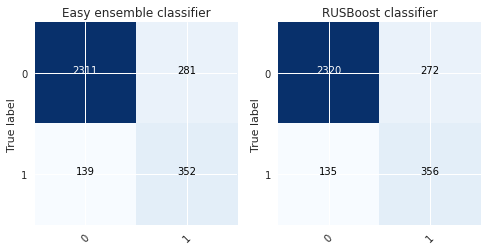

In [20]:
print('Easy ensemble classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_eec),
              geometric_mean_score(y_test, y_pred_eec)))
cm_eec = confusion_matrix(y_test, y_pred_eec)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_eec, classes=np.unique(y), ax=ax[0],
                      title='Easy ensemble classifier')

rusboost = RUSBoostClassifier(n_estimators=10,
                              base_estimator=base_estimator)
rusboost.fit(X_train_bal, y_train_bal)
y_pred_rusboost = rusboost.predict(X_test)
print('RUSBoost classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rusboost),
              geometric_mean_score(y_test, y_pred_rusboost)))
cm_rusboost = confusion_matrix(y_test, y_pred_rusboost)
plot_confusion_matrix(cm_rusboost, classes=np.unique(y),
                      ax=ax[1], title='RUSBoost classifier')

plt.show()

Training Metrics
Accuracy: 0.9137931034482759
Precision: 0.9067285965352749
Recall: 0.922477650063857
f1: 0.913786601117351
Roc -Auc Curve 0.9137931034482758
Test Metrics
Accuracy: 0.8679857281868311
Precision: 0.5668789808917197
Recall: 0.725050916496945
F1: 0.8742752777503753
Roc -Auc Curve 0.8100563224460033
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2592
           1       0.57      0.73      0.64       491

    accuracy                           0.87      3083
   macro avg       0.76      0.81      0.78      3083
weighted avg       0.88      0.87      0.87      3083



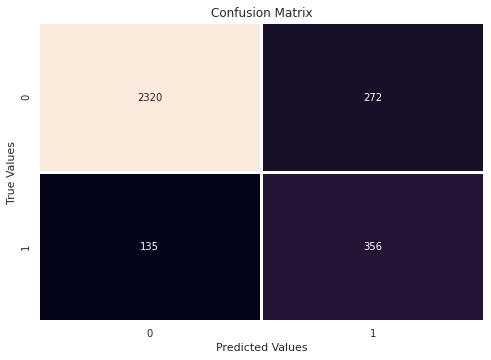

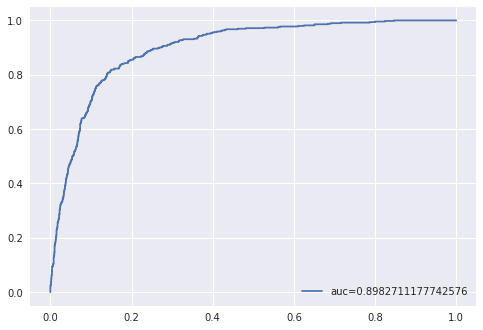

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support


eclf_train_pred= rusboost.predict(X_train_bal)

eclf_test_pred = y_pred_rusboost

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,eclf_train_pred))
print("Precision:",precision_score(y_train_bal,eclf_train_pred))
print("Recall:",recall_score(y_train_bal,eclf_train_pred))
print("f1:",f1_score(y_train_bal,eclf_train_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_bal,eclf_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,eclf_test_pred))
print("Precision:",precision_score(y_test,eclf_test_pred))
print("Recall:",recall_score(y_test,eclf_test_pred))
print("F1:",f1_score(y_test,eclf_test_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,eclf_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,eclf_test_pred))




from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, eclf_test_pred)

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba =  rusboost.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
